## Gerekli Kütüphanelerin Yüklenmesi
* Veri manipülasyonu ve analizi için **pandas** kütüpahnesi kullanılmıştır.
* Matematiksel hesaplamalar ve çok boyutlu veri işlemleri için **numpy** kütüphanesi kullanılmıştır.
* Veri setinin eğitim ve test kümelerine ayrılmasında **train_test_split** kütüphanesi kullanılmıştır.
* Çoklu doğrusal regresyon modeli oluşturulmasında **LinearRegression** kütüphanesi kullanılmıştır.
* Karar ağacı modeli oluşturulmasında **DecisionTreeRegressor** kütüphanesi kullanılmıştır.
* Model performansının değerlendirmesinde **mean_squared_error, r2_score** kütüphanesi kullanılmıştır.
* Elde edilen sonuçları grafiksel olarak görselleştirmek için **matplotlib.pyplot** kütüphanesi kullanılmıştır.
* Modelin genel istatistiksel analizlerini gerçekleştirmek ve anlamlılık testlerini yapmak için **statsmodels.api** kütüphanesi kullanılmıştır.
* İstatiksel verilen görselleştirilmesinde **seaborn** kütüphanesi kullanılmıştır.
* Özelliklerin standartlaştırılması (normalizasyonu) için **StandardScaler** kütüphanesi kullanılmıştır.
* Modelin genel performansını ölçmek amacıyla veri kümesinin farklı alt kümeleri üzerinde modelin eğitilmesini sağlayan **cross_val_score** kütüphanesi kullanılmıştır.

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler

## Veri Setinin Çalışma Ortamına Aktarılması

In [28]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
print(df.head())
print(df.info())

                                                                  Bejaia Region Dataset 
day month year Temperature  RH  Ws Rain  FFMC DMC DC  ISI BUI FWI              Classes  
01  06    2012 29          57  18  0     65.7 3.4 7.6 1.3 3.4 0.5            not fire   
02  06    2012 29          61  13  1.3   64.4 4.1 7.6 1   3.9 0.4            not fire   
03  06    2012 26          82  22  13.1  47.1 2.5 7.1 0.3 2.7 0.1            not fire   
04  06    2012 25          89  13  2.5   28.6 1.3 6.9 0   1.7 0              not fire   
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 247 entries, ('day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI') to ('30', '09', '2012', '24', '64', '15', '0.2', '67.3', '3.8', '16.5', '1.2', '4.8', '0.5')
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Bejaia Region Dataset   245 non-null    object
dtypes: object(1)

## Veri Setinin ve Sütun İsimlerinin Düzenlenmesi
* Veri seti, sütun isimleri manuel olarak tanımlanarak çalışma ortamına yüklendi ve ilk birkaç satırı görüntülenerek veri yapısının doğruluğu kontrol edildi.
* Amaç, Veri setinde kullanılacak değerlerin ve kullanılmayacak kısımların ayarlanması.

In [31]:
column_names = ['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes']


df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', 
                sep=',', 
                skiprows=[0,1, 124, 125], # skip the dataset description rows
                names=column_names)



print(df.head())
print(df.info())

  day month  year temperature  rh  ws  rain  ffmc  dmc    dc  isi  bui  fwi  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

       classes  
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          245 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   temperature  245 non-null    object
 4   rh           245 non-null    object
 5   ws           245 non-null 

## Gereksiz Sütunların Kaldırılması
* Tarih bilgilerini içeren day, month ve year sütunları analiz için gerekli olmadığından dolayı veri setinden çıkarılmıştır.

In [34]:
df = df.drop(['day', 'month', 'year'], axis=1)

In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   temperature  245 non-null    object
 1   rh           245 non-null    object
 2   ws           245 non-null    object
 3   rain         245 non-null    object
 4   ffmc         245 non-null    object
 5   dmc          245 non-null    object
 6   dc           245 non-null    object
 7   isi          245 non-null    object
 8   bui          245 non-null    object
 9   fwi          245 non-null    object
 10  classes      244 non-null    object
dtypes: object(11)
memory usage: 21.2+ KB
None


## Kategorik Verilerin Sayısal Türe Dönüştürülmesi
* object türündeki sütunlar, analiz ve hesaplama işlemlerinde kullanılabilmesi için float türüne dönüştürülmüştür. Hatalı değerler tespit edildiğinde, errors='coerce' parametresi ile bu değerler NaN olarak atanmıştır.

In [53]:
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  244 non-null    float64
 1   rh           244 non-null    float64
 2   ws           244 non-null    float64
 3   rain         244 non-null    float64
 4   ffmc         244 non-null    float64
 5   dmc          244 non-null    float64
 6   dc           243 non-null    float64
 7   isi          244 non-null    float64
 8   bui          244 non-null    float64
 9   fwi          243 non-null    float64
 10  classes      0 non-null      float64
dtypes: float64(11)
memory usage: 21.2 KB
None


## Bağımsız ve Bağımlı Değişkenlerin Seçimi
* Bu adımda, df veri setindeki 'classes' ve 'fwi' sütunları çıkarılarak, bağımsız değişkenler (X) ve bağımlı değişken (y) oluşturulmuştur. 'classes' ve 'fwi' sütunları, modelin eğitiminde kullanılmayacak, bu yüzden bunlar çıkarılmıştır. 'fwi' sütunu ise bağımlı değişken olarak belirlenmiştir.

In [56]:
X = df.drop(['classes', 'fwi'], axis=1)
y = df['fwi']

print("Bağımsız Değişkenler (X):")
print(X)
print("\nBağımlı Değişken (y):")
print(y)

Bağımsız Değişkenler (X):
     temperature    rh    ws  rain  ffmc   dmc    dc  isi   bui
0           29.0  57.0  18.0   0.0  65.7   3.4   7.6  1.3   3.4
1           29.0  61.0  13.0   1.3  64.4   4.1   7.6  1.0   3.9
2           26.0  82.0  22.0  13.1  47.1   2.5   7.1  0.3   2.7
3           25.0  89.0  13.0   2.5  28.6   1.3   6.9  0.0   1.7
4           27.0  77.0  16.0   0.0  64.8   3.0  14.2  1.2   3.9
..           ...   ...   ...   ...   ...   ...   ...  ...   ...
240         30.0  65.0  14.0   0.0  85.4  16.0  44.5  4.5  16.9
241         28.0  87.0  15.0   4.4  41.1   6.5   8.0  0.1   6.2
242         27.0  87.0  29.0   0.5  45.9   3.5   7.9  0.4   3.4
243         24.0  54.0  18.0   0.1  79.7   4.3  15.2  1.7   5.1
244         24.0  64.0  15.0   0.2  67.3   3.8  16.5  1.2   4.8

[245 rows x 9 columns]

Bağımlı Değişken (y):
0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
240    6.5
241    0.0
242    0.2
243    0.7
244    0.5
Name: fwi, Length: 245, dtype: float64

## Eksik Değerlerin Silinmesi
* Bağımsız ve bağımlı değişkenler (X ve y) birleştirilerek, eksik değerlere sahip satırlar (NaN değerler) silinmiştir. Bu işlem, modelin eğitiminde eksik veri nedeniyle oluşabilecek hataların önüne geçmek amacıyla yapılmaktadır.

In [59]:
X_y = pd.concat([X, y], axis=1)
X_y = X_y.dropna()

## X ve y'yi Tekrar Ayırma
* Bu adımda, daha önce eksik değerler silindikten sonra birleşmiş olan X_y veri çerçevesi tekrar iki farklı değişkene ayrılmaktadır.

In [62]:
X = X_y.drop(columns=[y.name])
y = X_y[y.name]

## Eksik Değerlerin Kontrol Edilmesi

In [65]:
print("Eksik Değerlerin Sayısı (X):")
print(X.isnull().sum())

print("\nEksik Değerlerin Sayısı (y):")
print(y.isnull().sum())

Eksik Değerlerin Sayısı (X):
temperature    0
rh             0
ws             0
rain           0
ffmc           0
dmc            0
dc             0
isi            0
bui            0
dtype: int64

Eksik Değerlerin Sayısı (y):
0


## Veriyi Eğitim ve Test Setlerine Ayırma

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Veri Standartlaştırması

In [71]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Çoklu Doğrusal Regresyon ve Karar Ağacı Regresyonu Modelleri Eğitimi

In [74]:
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)

## Cross-validation İle Modelleri Değerlendirme
* Modelin genel performansını daha doğru bir şekilde ölçmeyi sağlar.
* Değerlendirme Sonucu , **Çoklu Doğrusal Regresyon** daha iyi bir genel performans gösterirken, **Karar Ağacı Regresyon**, Çoklu Doğrusal Regresyona göre daha kötü. Bu, karar ağacının aşırı uyum yapma eğiliminde olduğunu düşündürüyor.

In [77]:
cv_lr_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_dt_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"\nÇoklu Doğrusal Regresyon - Cross-Validation MSE (5 katlı): {-cv_lr_scores.mean():.4f}")
print(f"Karar Ağacı Regresyonu - Cross-Validation MSE (5 katlı): {-cv_dt_scores.mean():.4f}")



Çoklu Doğrusal Regresyon - Cross-Validation MSE (5 katlı): 2.3056
Karar Ağacı Regresyonu - Cross-Validation MSE (5 katlı): 3.6692


## Modelleri Eğitme
* Çapraz doğrulama (Cross- validation) sonrası modelleri eğitim ve test seti üzerinde tahminler yapması için ayarlamalarımızı yapıyoruz

In [80]:
lr_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

## Test Seti Üzerinde Tahminler Yapma

In [83]:
lr_predictions = lr_model.predict(X_test_scaled)
dt_predictions = dt_model.predict(X_test_scaled)

## Modellerin Performansının Değerlendirilmesi

In [86]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R2: {r2:.4f}")

evaluate_model(y_test, lr_predictions, "Çoklu Doğrusal Regresyon")
evaluate_model(y_test, dt_predictions, "Karar Ağacı Regresyonu")

Çoklu Doğrusal Regresyon - MSE: 0.3554, R2: 0.9883
Karar Ağacı Regresyonu - MSE: 2.2878, R2: 0.9245


## Eğitim Ve Test Setleri İçin MSE Ve R2 Hesaplamaları
* Overfitting durumunu görebilmemiz adına baktığımız bir durumdur
* Çıktılarda da görüldüğü üzere **Karar Ağacı Regresyon** Modeli eğitim verisinde mükemmel sonuçlar verirken, test verisinde daha kötü bir performans veriyor. Bu da modelin overfitting (aşırı uyum) yapmış olabileceğini gösteriyor.

In [89]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R²: {r2:.4f}")
    return mse, r2


lr_train_mse, lr_train_r2 = evaluate_model(y_train, lr_model.predict(X_train_scaled), "Çoklu Doğrusal Regresyon (Eğitim)")
dt_train_mse, dt_train_r2 = evaluate_model(y_train, dt_model.predict(X_train_scaled), "Karar Ağacı Regresyonu (Eğitim)")


lr_test_mse, lr_test_r2 = evaluate_model(y_test, lr_predictions, "Çoklu Doğrusal Regresyon (Test)")
dt_test_mse, dt_test_r2 = evaluate_model(y_test, dt_predictions, "Karar Ağacı Regresyonu (Test)")

Çoklu Doğrusal Regresyon (Eğitim) - MSE: 1.6330, R²: 0.9731
Karar Ağacı Regresyonu (Eğitim) - MSE: 0.0000, R²: 1.0000
Çoklu Doğrusal Regresyon (Test) - MSE: 0.3554, R²: 0.9883
Karar Ağacı Regresyonu (Test) - MSE: 2.2878, R²: 0.9245


## Eğitim Ve Test Setleri İçin MSE Ve R2 Grafik Gösterimi

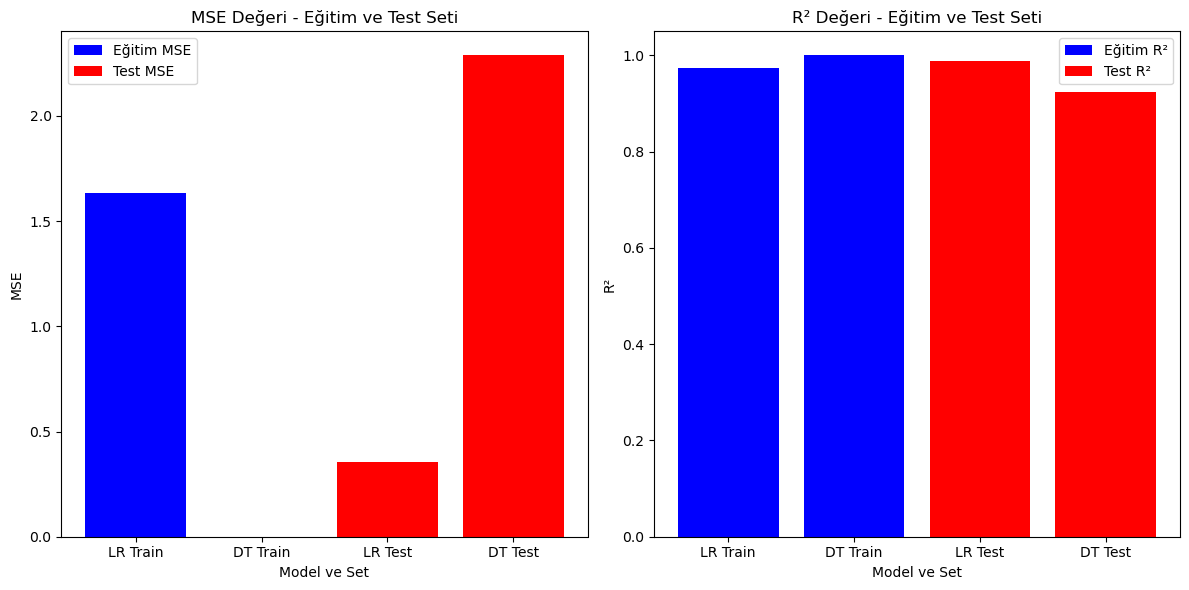

In [94]:
# Eğitim ve test MSE ve R² değerlerini grafik için toplama
mse_values = [lr_train_mse, dt_train_mse, lr_test_mse, dt_test_mse]
r2_values = [lr_train_r2, dt_train_r2, lr_test_r2, dt_test_r2]
labels = ['LR Train', 'DT Train', 'LR Test', 'DT Test']

# MSE ve R² değerleri için sütun grafiği oluşturma
plt.figure(figsize=(12, 6))

# MSE sütun grafiği
plt.subplot(1, 2, 1)
plt.bar(labels[:2], mse_values[:2], color='blue', label='Eğitim MSE')
plt.bar(labels[2:], mse_values[2:], color='red', label='Test MSE')
plt.xlabel('Model ve Set')
plt.ylabel('MSE')
plt.title('MSE Değeri - Eğitim ve Test Seti')
plt.legend()

# R² sütun grafiği
plt.subplot(1, 2, 2)
plt.bar(labels[:2], r2_values[:2], color='blue', label='Eğitim R²')
plt.bar(labels[2:], r2_values[2:], color='red', label='Test R²')
plt.xlabel('Model ve Set')
plt.ylabel('R²')
plt.title('R² Değeri - Eğitim ve Test Seti')
plt.legend()

# Grafik gösterimi
plt.tight_layout()
plt.show()

## Modelin Anlamlılığının Test Edilmesi
* F-İstatistiği, bağımsız değişkenlerin bağımlı değişken üzerinde önemli bir etkiye sahip olup olmadığını test eder. Yüksek bir F-İstatistiği değeri, bağımsız değişkenlerin modelde anlamlı bir katkı sağladığını ve genel model performansının iyi olduğunu gösterir.
* F-İstatistiği değeri arttıkça, p-değeri azalır ve bu durumda modelin bağımlı değişkeni açıklama gücünün istatistiksel olarak anlamlı olduğu kabul edilir.

In [97]:
X_train_sm = sm.add_constant(X_train) 
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())  

                            OLS Regression Results                            
Dep. Variable:                    fwi   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     739.1
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          2.31e-139
Time:                        02:02:48   Log-Likelihood:                -322.85
No. Observations:                 194   AIC:                             665.7
Df Residuals:                     184   BIC:                             698.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.4888      1.922      1.295      

## Korelasyon Isı Haritası
* Veri setindeki tüm değişkenler arasındaki korelasyonu görselleştirerek, hangi özelliklerin birbirleriyle daha ilişkili olduğunu analiz edebiliriz.

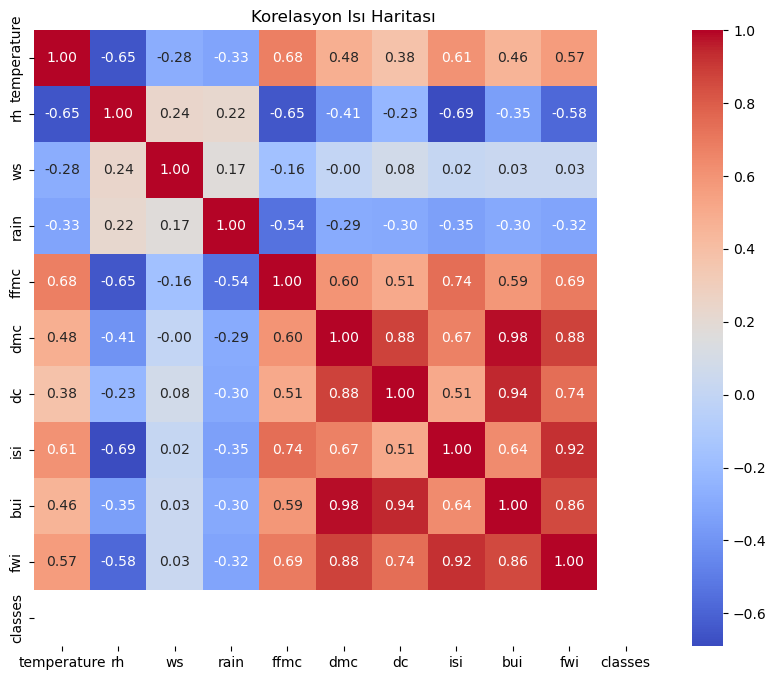

In [100]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasyon Isı Haritası")
plt.show()

## Güven Aralıklarını Hesaplama ve Görselleştirme (Çoklu Doğrusal Regresyon için)
* Çoklu doğrusal regresyon modeli kullanılarak yapılan tahminlerin güven aralıkları hesaplanmaktadır. Statsmodels kütüphanesi ile eğitilen model, test setindeki tahminler için alt ve üst güven sınırlarını sağlar.

In [103]:
# Güven aralıklarını hesaplama (Linear Regression için)
X_test_sm = sm.add_constant(X_test_scaled)  # Statsmodels ile güven aralığı için sabit ekleme
ols_model = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()
predictions_with_intervals = ols_model.get_prediction(X_test_sm).summary_frame(alpha=0.05)

## Güven Aralıkları Görselleştirme

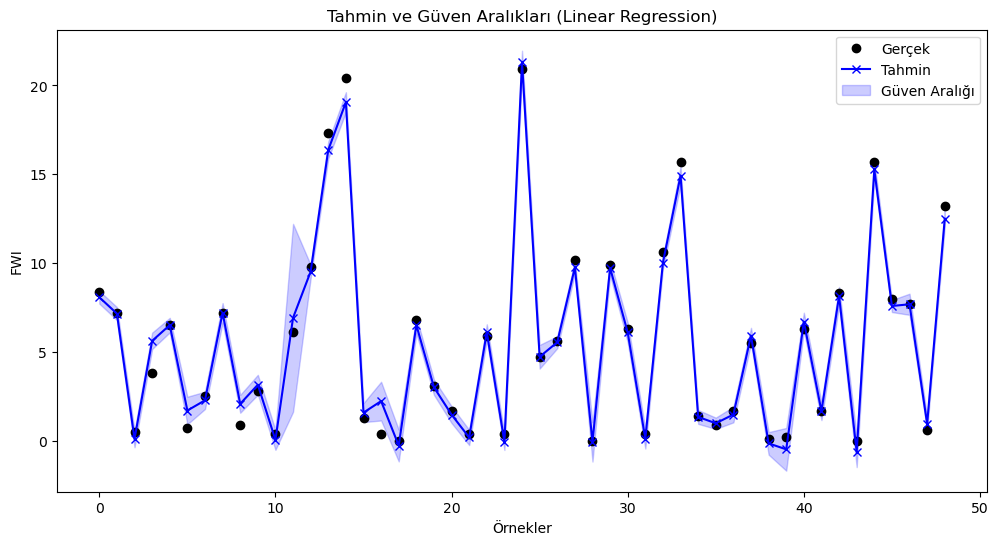

In [106]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Gerçek', color='black', marker='o', linestyle='')
plt.plot(range(len(lr_predictions)), lr_predictions, label='Tahmin', color='blue', marker='x', linestyle='-')
plt.fill_between(range(len(predictions_with_intervals['mean'])),
                 predictions_with_intervals['mean_ci_lower'],
                 predictions_with_intervals['mean_ci_upper'], color='blue', alpha=0.2, label='Güven Aralığı')
plt.xlabel('Örnekler')
plt.ylabel('FWI')
plt.title('Tahmin ve Güven Aralıkları (Linear Regression)')
plt.legend()
plt.show()

## Çoklu Doğrusal Regresyon ve Karar Ağacı Regresyonu Hatalarının Dağılımı
* Bu grafik, çoklu doğrusal regresyon ve karar ağacı regresyonu modellerinin test setindeki tahmin hatalarının dağılımını göstermektedir. Hata değerleri, her iki modelin tahmin performansları arasındaki farkları anlamamızı sağlar.

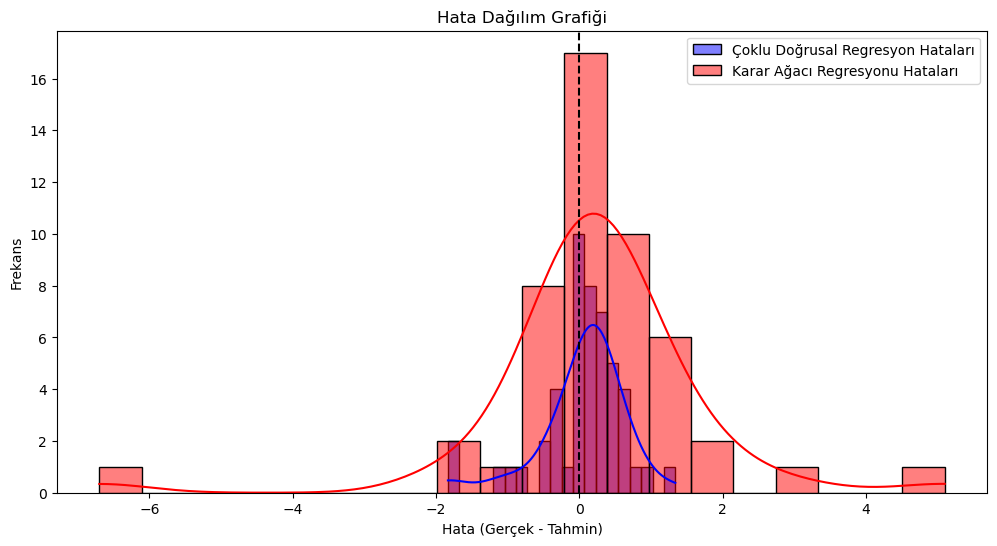

In [109]:
lr_errors = y_test - lr_predictions
dt_errors = y_test - dt_predictions

plt.figure(figsize=(12, 6))
sns.histplot(lr_errors, kde=True, color='blue', label='Çoklu Doğrusal Regresyon Hataları', bins=20)
sns.histplot(dt_errors, kde=True, color='red', label='Karar Ağacı Regresyonu Hataları', bins=20)
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Hata Dağılım Grafiği')
plt.xlabel('Hata (Gerçek - Tahmin)')
plt.ylabel('Frekans')
plt.legend()
plt.show()

## Gerçek vs Tahmin Edilen FWI Değerleri
* Bu grafik, çoklu doğrusal regresyon ve karar ağacı regresyonu modellerinin test setindeki gerçek FWI değerleri ile tahmin edilen FWI değerlerini karşılaştırmaktadır.
* Gerçek değerler ile tahmin edilen değerler arasındaki ilişkiyi daha iyi anlayabilmek için, doğru tahmin edilen noktalar, eğik çizgiyle gösterilmektedir.

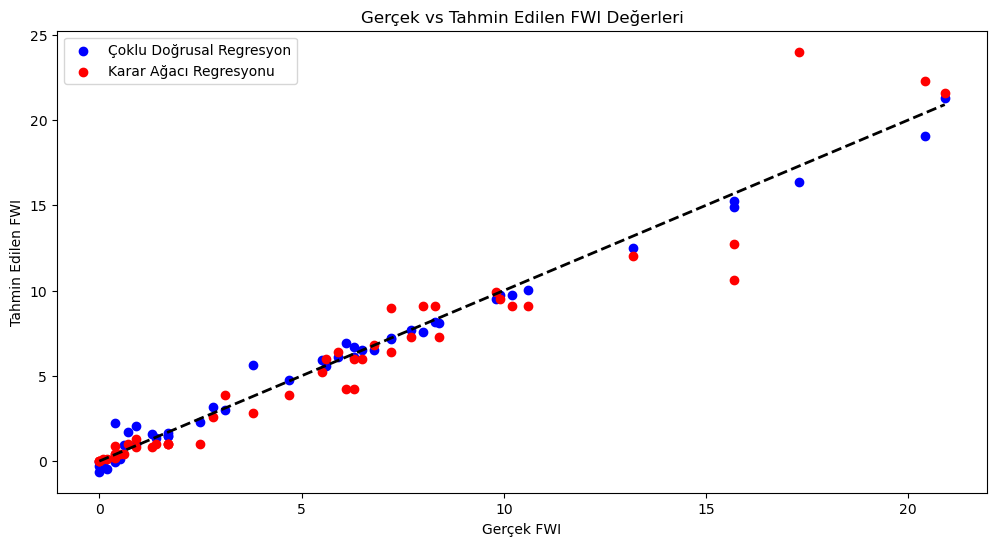

In [114]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, lr_predictions, color='blue', label='Çoklu Doğrusal Regresyon')
plt.scatter(y_test, dt_predictions, color='red', label='Karar Ağacı Regresyonu')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek FWI')
plt.ylabel('Tahmin Edilen FWI')
plt.title('Gerçek vs Tahmin Edilen FWI Değerleri')
plt.legend()
plt.show()

## Karar Ağacı Regresyonu - Özellik Önem Dereceleri
* Karar ağacı regresyonu modelinin özelliklerin (bağımsız değişkenlerin) önem derecelerini göstermektedir. Her bir özelliğin model tahminlerine katkı düzeyini görmek için, özelliklerin önem sırasına göre sıralanmış bar grafik üzerinde gösterimi yapılmıştır

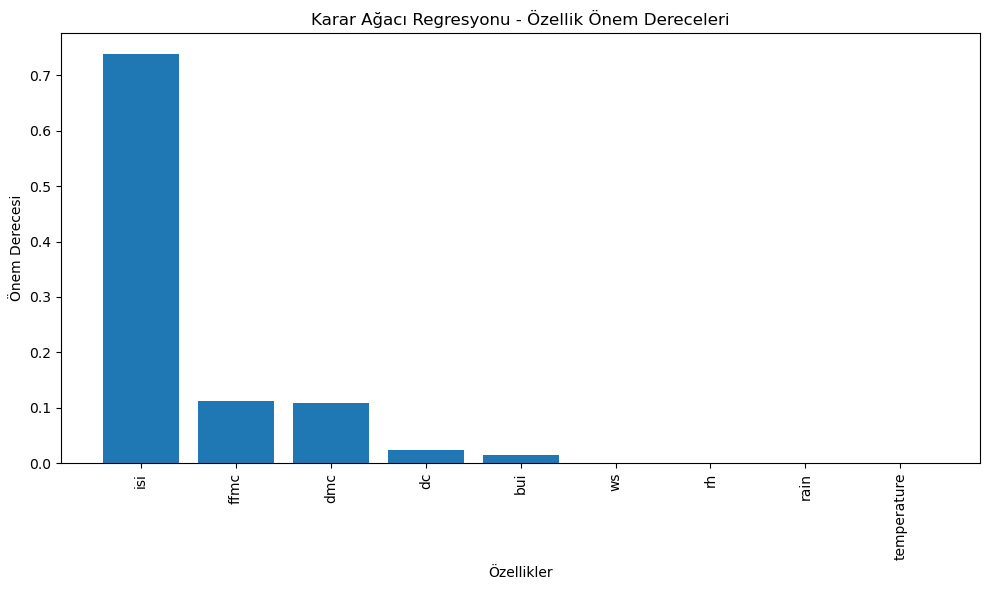

In [117]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Özellikler')
plt.ylabel('Önem Derecesi')
plt.title('Karar Ağacı Regresyonu - Özellik Önem Dereceleri')
plt.tight_layout()
plt.show()

## Eğitim ve Test Seti Performanslarının Karşılaştırılması
* Çoklu doğrusal regresyon ve karar ağacı regresyonu modellerinin eğitim ve test setlerine yönelik tahminlerini gerçek değerlerle karşılaştıran görsel grafikler oluşturulmuştur. Modellerin performansı, her iki set için gerçek ve tahmin edilen FWI değerleri arasındaki ilişkiyi göstermektedir.

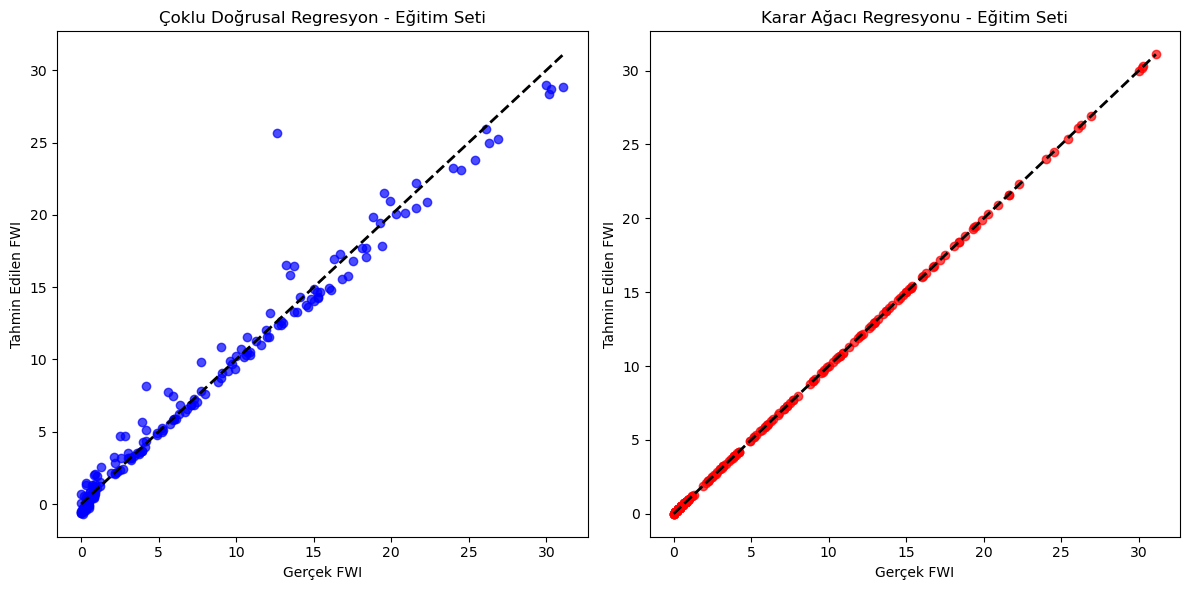

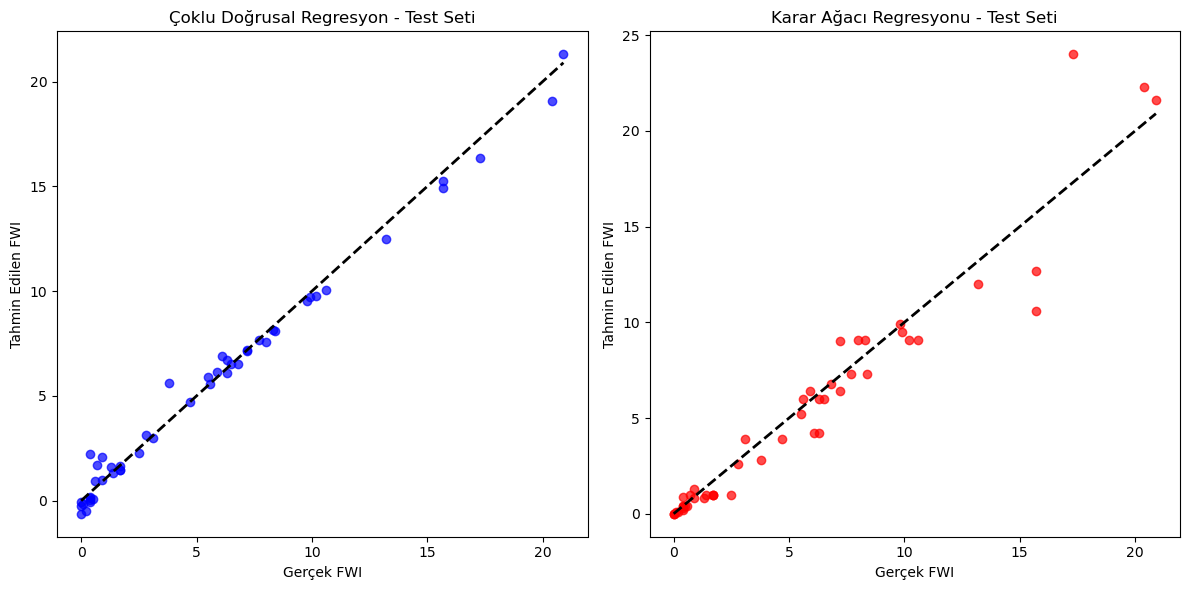

In [120]:
# Eğitim seti tahminleri
lr_train_predictions = lr_model.predict(X_train_scaled)
dt_train_predictions = dt_model.predict(X_train_scaled)

# Eğitim seti performansı grafiği
plt.figure(figsize=(12, 6))

# Çoklu Doğrusal Regresyon
plt.subplot(1, 2, 1)
plt.scatter(y_train, lr_train_predictions, color='blue', label='Çoklu Doğrusal Regresyon (Eğitim)', alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Gerçek FWI')
plt.ylabel('Tahmin Edilen FWI')
plt.title('Çoklu Doğrusal Regresyon - Eğitim Seti')

# Karar Ağacı Regresyonu
plt.subplot(1, 2, 2)
plt.scatter(y_train, dt_train_predictions, color='red', label='Karar Ağacı Regresyonu (Eğitim)', alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Gerçek FWI')
plt.ylabel('Tahmin Edilen FWI')
plt.title('Karar Ağacı Regresyonu - Eğitim Seti')

plt.tight_layout()
plt.show()

# Test seti performansı grafiği
plt.figure(figsize=(12, 6))

# Çoklu Doğrusal Regresyon
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions, color='blue', label='Çoklu Doğrusal Regresyon (Test)', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek FWI')
plt.ylabel('Tahmin Edilen FWI')
plt.title('Çoklu Doğrusal Regresyon - Test Seti')

# Karar Ağacı Regresyonu
plt.subplot(1, 2, 2)
plt.scatter(y_test, dt_predictions, color='red', label='Karar Ağacı Regresyonu (Test)', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek FWI')
plt.ylabel('Tahmin Edilen FWI')
plt.title('Karar Ağacı Regresyonu - Test Seti')

plt.tight_layout()
plt.show()
